In [67]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from scipy.interpolate import UnivariateSpline, interp1d
%matplotlib inline

In [63]:
u, g, r, i, z, pet_r, d = np.genfromtxt("KnownUCDs.txt", skip_header=1,usecols=(1,2,3,4,5,6,7), unpack=True);
name = np.genfromtxt("KnownUCDs.txt", dtype=str,skip_header=1,usecols=0);

m_V = g - 0.5784 * (g-r) - 0.0038;
DistanceModulus = 5 *  (np.log10(d*1e-6) + 5);
M = m_V - DistanceModulus;
color_ug = u-g
color_ur = u-r
color_ui = u-i
color_uz = u-z
color_gr = g-r
color_gi = g-i
color_gz = g-z
color_ri = r-i
color_rz = r-z
colors = [color_ug, color_ur, color_ui, color_uz, color_gr, color_gi, color_gz, color_ri, color_rz]
colornames = ['color_ug', 'color_ur', 'color_ui', 'color_uz', 'color_gr', 'color_gi', 'color_gz', 'color_ri', 'color_rz']

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


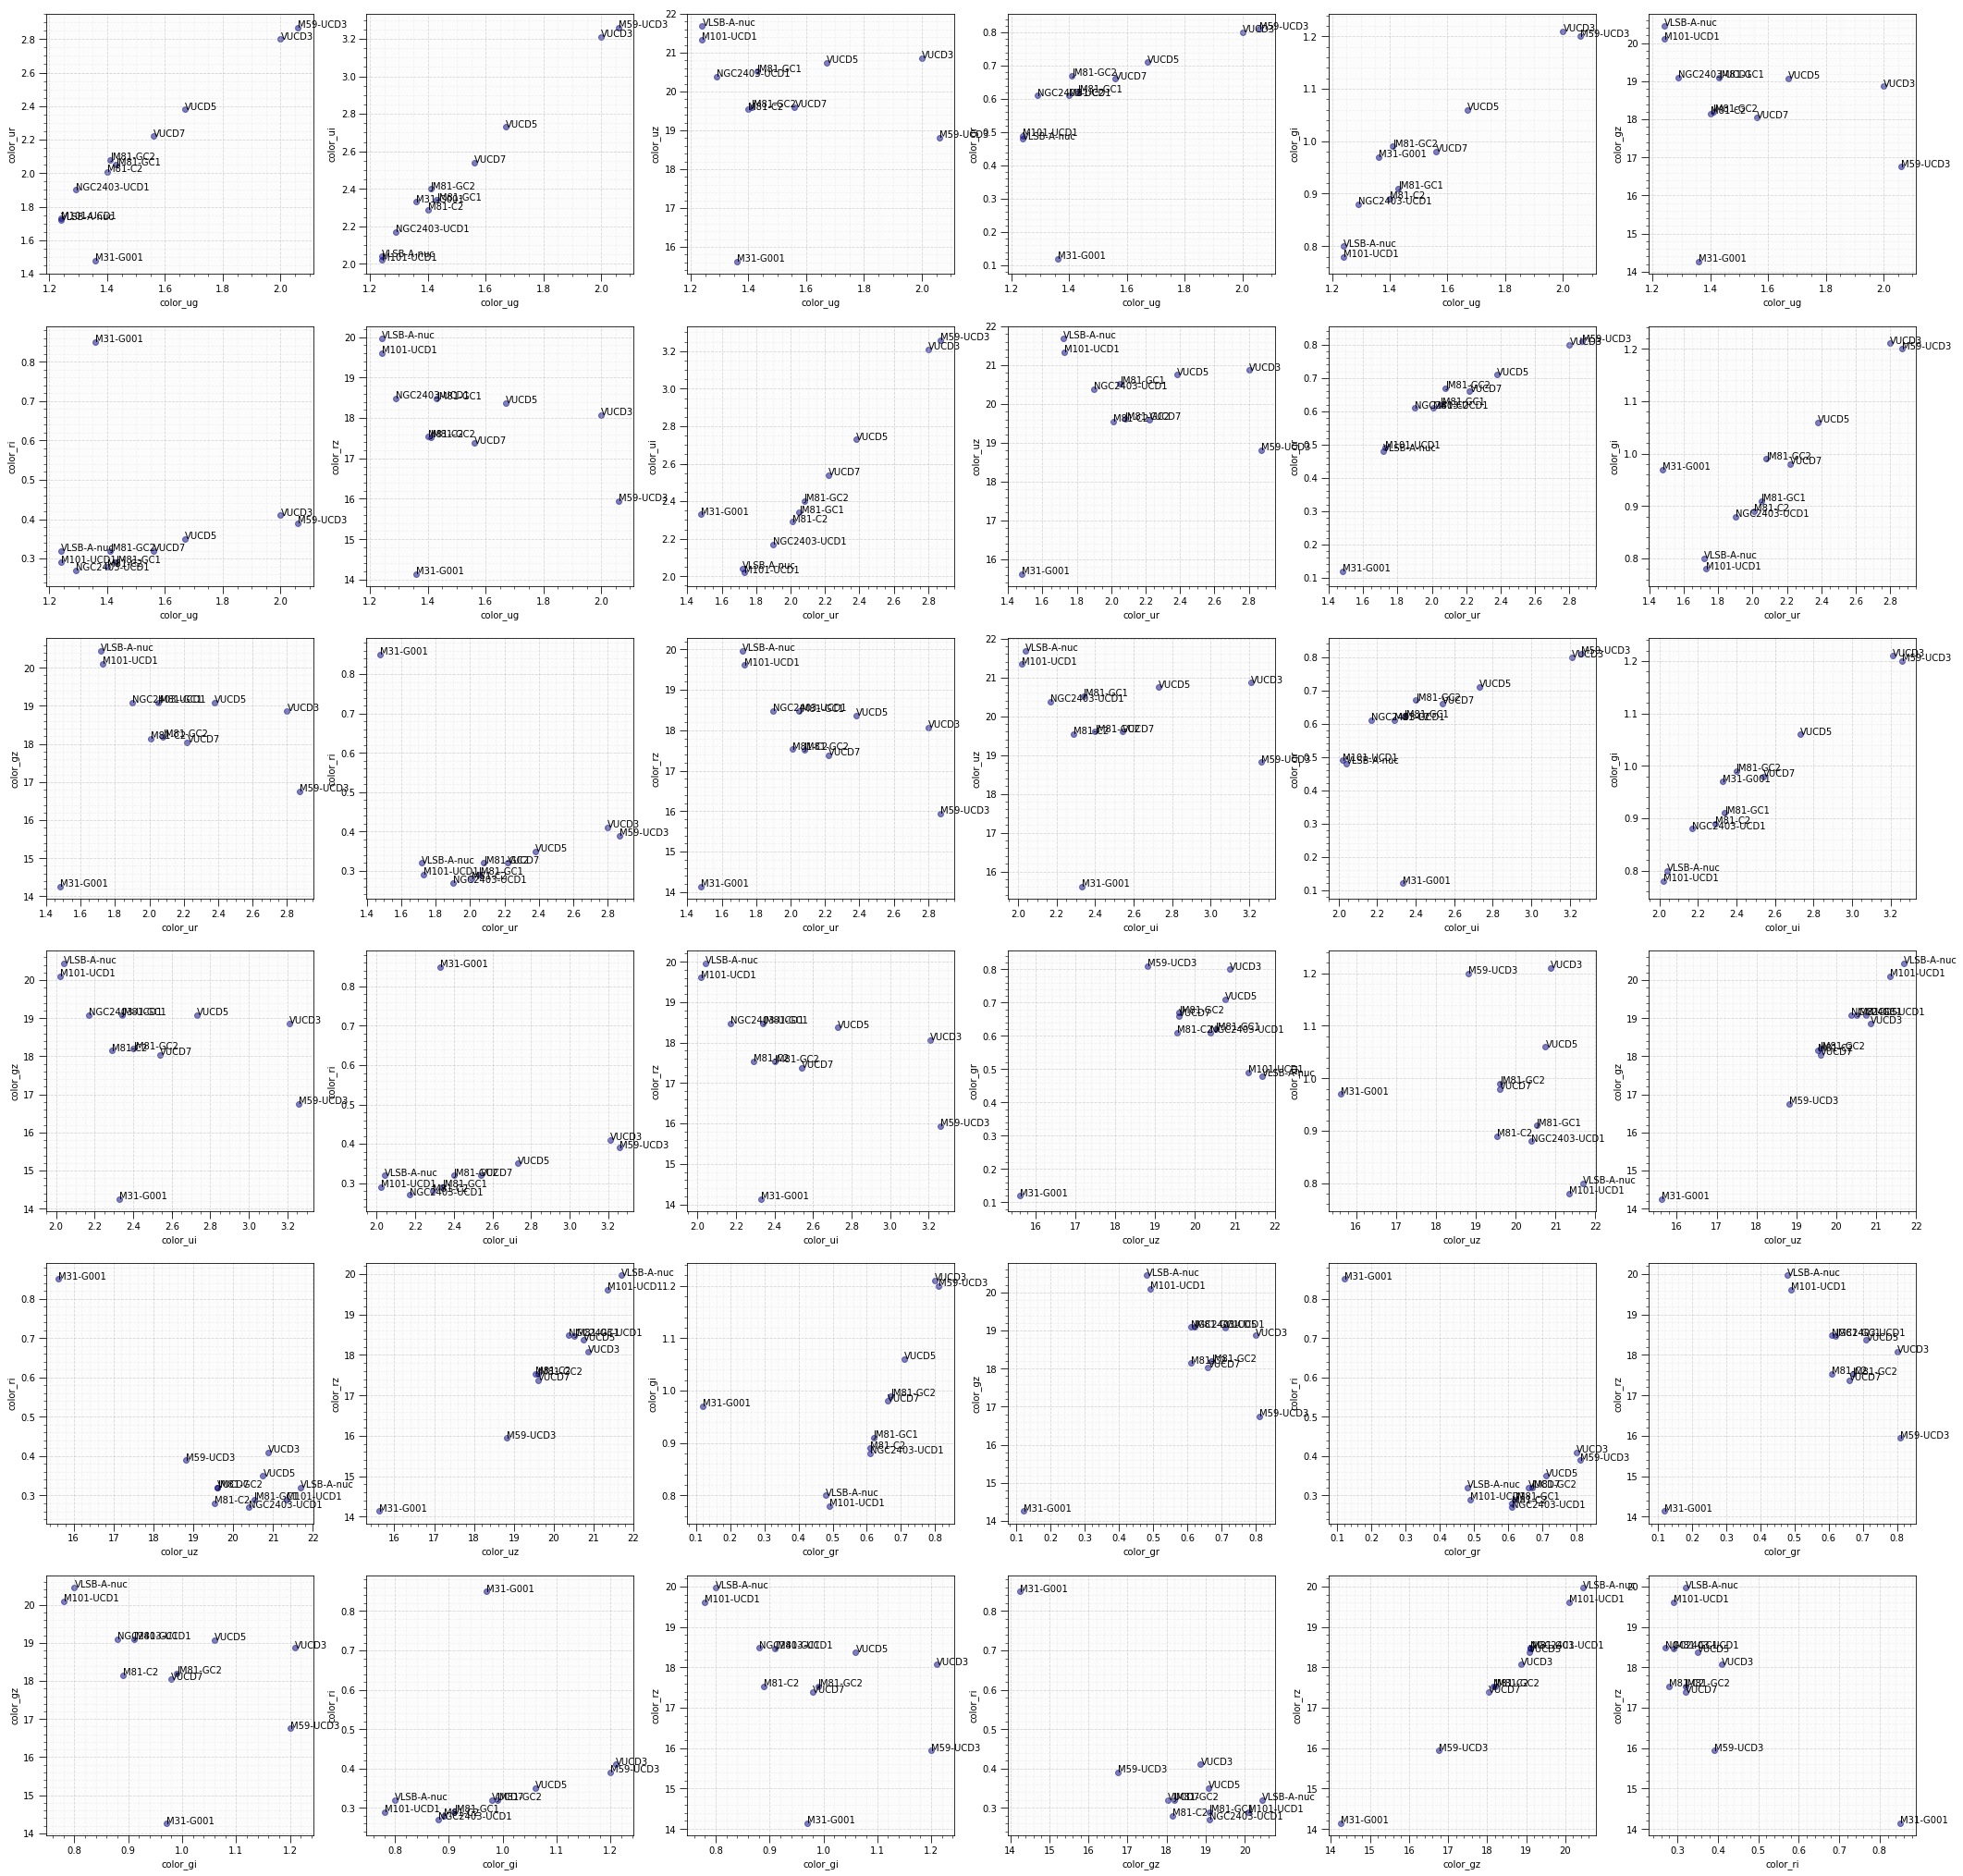

In [65]:
height_ratios = [5, 5, 5, 5, 5, 5]
width_ratios = [5, 5, 5, 5, 5, 5]
wspace = 1.25
hspace = 1.25
x = 0
y = 0
fig = plt.figure(figsize=(sum(width_ratios) + wspace *
                          (len(width_ratios) - 1),
                          sum(height_ratios) + hspace *
                          (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios),
                       len(width_ratios),
                       height_ratios=height_ratios,
                       width_ratios=width_ratios)

fig.suptitle('', fontsize=20)
location = 0
for i, icolor in enumerate(colors):
    for j, jcolor in enumerate(colors):
        if i != j and j > i:
            ax = fig.add_subplot(gs[location])
            ax.scatter(icolor, jcolor, c='navy',marker='o',alpha='.5');
            for k, kval in enumerate(name):
                ax.annotate(kval, xy=(icolor[k],jcolor[k]));
            ax.update({'title': '',
                        'ylabel': '{}'.format(colornames[j]),
                        'xlabel': '{}'.format(colornames[i])})
            ax.set_facecolor('whitesmoke')
            ax.patch.set_alpha(.25)
            #ax.set_xlim((min(icolor)*.9, max(icolor)*1.1))
            #ax.set_ylim((min(jcolor)*.9, max(jcolor)*1.1))

            plt.minorticks_on()
            plt.tick_params('both', length=8, which='major')
            plt.tick_params('both',length=3, which='minor')
            plt.grid(True, which='major', ls='dashed', alpha=.5)
            plt.grid(True, which='minor', ls='dashed', alpha=.15)
            location += 1
            print location
plt.savefig('fig.png')
plt.show()

#Plot redshift z vs i to see variance in color per distance (linear data means more reliable data)